In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import calendar
import datetime

#Este programa está destinado a leer los datos de la CONAGUA y determinar
#la información de cada mes en diferentes parámetros.

os.chdir('/Users/Usuario/Python')

#Este bloque determina los elementos nulos de la tabla de datos.
missing=['NULO']
df = pd.read_csv('fuentes.txt', sep='\s+', na_values=missing)
pd.isnull(df)


df.dropna()



,FECHA,PRECIP,EVAP,TMAX,TMIN
0,05/05/1954,0.0,4.0,33.5,13.0
1,06/05/1954,0.0,4.2,35.5,11.5
2,07/05/1954,0.0,4.2,36.5,12.5
3,08/05/1954,0.0,7.8,38.5,12.5
4,09/05/1954,0.0,5.8,33.5,16.5
5,10/05/1954,0.0,3.0,32.5,14.5
6,11/05/1954,0.0,4.1,34.5,11.5
7,12/05/1954,0.0,7.6,33.5,15.5
8,13/05/1954,0.0,10.0,34.5,12.5
9,14/05/1954,0.0,12.0,33.5,14.0


In [3]:
#Ya leídos los datos, podemos hacer uso de unas funciones encadenadas que 
#nos ayudan a visulaizar la información con el formato de fechas.

#Los meses mas lluviosos se calculan a partir de checar los precipitaciones
#mensuales y determinar el promedio.
#El orden mostrará al mes menos lluvioso en el principio.
df.groupby(df['FECHA'].dt.strftime('%B'))['PRECIP'].mean().sort_values()

#De esta tabla podemos determinar cuales son los meses más secos y cuáles son
#los m´s húmedos, ya que miden la precipitacion promedio.

FECHA
May          0.121834
June         0.168335
April        0.199748
March        0.232121
February     0.293989
January      0.358068
November     0.371338
December     0.455344
October      0.476121
September    0.542092
August       0.983522
July         1.146821
Name: PRECIP, dtype: float64

In [7]:
#Ahora haremos un análisis de las temperaturas en la zona de Hermosillo, 
#mostrando los valores máximos y mínimos de cada mes.
df.groupby(df['FECHA'].dt.strftime('%B'))['TMAX'].mean().sort_values()


FECHA
January      25.982274
December     26.043349
February     27.254781
November     28.796338
March        28.961455
April        30.957862
October      32.203430
May          33.087455
September    34.736607
August       35.209434
June         35.243429
July         35.720694
Name: TMAX, dtype: float64

In [9]:
df.groupby(df['FECHA'].dt.strftime('%B'))['TMIN'].mean().sort_values()

FECHA
January       7.722616
December      7.978622
February      8.434426
March         9.217333
November      9.567929
April        10.973836
May          13.232931
October      13.662269
June         17.581977
September    18.117347
August       19.742767
July         19.994451
Name: TMIN, dtype: float64

In [11]:
df.groupby(df['FECHA'].dt.strftime('%Y'))['TMIN'].mean().sort_values()
#En el caso de esta tabla, podemos ver que el año 1970 tuvo el valor mas
#bajo d temperatura respecto al otro.

FECHA
1970     6.245902
1968     6.548387
1963     8.179916
1979    10.444444
1958    11.216292
1971    11.660274
1975    11.846685
1985    11.957812
1965    12.063934
1960    12.095638
1973    12.224658
1964    12.261918
1961    12.715743
1972    12.728142
1956    12.800279
1962    12.920420
1974    12.973973
1982    13.070833
1955    13.162500
1977    13.442265
1966    13.443836
1967    13.520548
1984    13.530259
1983    13.700549
1957    13.897516
1980    14.016575
1959    14.152878
1978    14.267490
1981    14.522099
1986    15.579932
1976    15.761168
1954    17.322785
Name: TMIN, dtype: float64

In [14]:
df.groupby(df['FECHA'].dt.strftime('%Y'))['TMAX'].mean().sort_values()
#Los registros indican que el año 1954 tuvo un valor mas elevado de
#temperaturas máximas.

FECHA
1968    23.096774
1970    26.877049
1985    29.109375
1965    29.111475
1958    29.623596
1960    29.750000
1971    29.850685
1979    30.555556
1982    30.695833
1983    30.762363
1972    30.796448
1973    30.900000
1957    30.941615
1977    31.001381
1964    31.089863
1963    31.108787
1980    31.168508
1984    31.224784
1961    31.227405
1975    31.313536
1981    31.353591
1974    31.500000
1962    31.774775
1976    31.888316
1956    31.912011
1959    32.046763
1955    32.076563
1978    32.098765
1966    32.110959
1986    32.302721
1967    32.865753
1954    35.580169
Name: TMAX, dtype: float64

In [17]:
df.describe()
#Esta función "describe", nos indica la información estadística de cada columna
# de la tabla de datos.
#Puede ser muy útil al momento de querer checar una versión mas directa
#de estos parámetros.

,PRECIP,EVAP,TMAX,TMIN
count,9634.000000,9634.000000,9634.000000,9634.000000
mean,0.449574,6.860619,31.198516,13.045900
std,3.040309,3.266884,6.743938,8.031797
min,0.000000,0.100000,6.000000,-6.000000
25%,0.000000,4.200000,26.000000,6.000000
50%,0.000000,6.500000,32.000000,11.500000
75%,0.000000,9.400000,37.000000,21.500000
max,68.000000,17.900000,48.500000,31.500000


In [25]:
#Ahora veremos los tipos de variables que podemos encontrar en la tabla de datos.
df.dtypes

#Como podemos ver, los tipos son números flotantes en todas las columnas 
#menos en las fechas, ya que les definí un tipo mas arriba.

FECHA     datetime64[ns]
PRECIP           float64
EVAP             float64
TMAX             float64
TMIN             float64
dtype: object

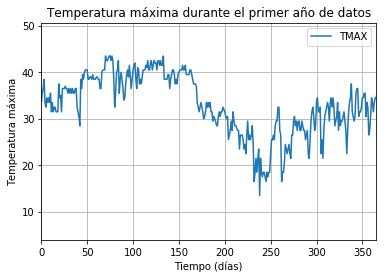

FECHA
January      25.982274
December     26.043349
February     27.254781
November     28.796338
March        28.961455
April        30.957862
October      32.203430
May          33.087455
September    34.736607
August       35.209434
June         35.243429
July         35.720694
Name: TMAX, dtype: float64

In [53]:
#En la siguiente gráfica podemos ver como la temperatura máxima varía a lo
#largo de un año.
plt.figure(); df.TMAX.plot(); plt.legend(loc='best')
plt.title("Temperatura máxima durante el primer año de datos")
plt.ylabel("Temperatura máxima")
plt.xlabel("Tiempo (días)")
plt.xlim((0,365))
plt.grid(True)
plt.savefig("tmax",dpi=2000)
plt.show()

df.groupby(df['FECHA'].dt.strftime('%B'))['TMAX'].mean().sort_values()


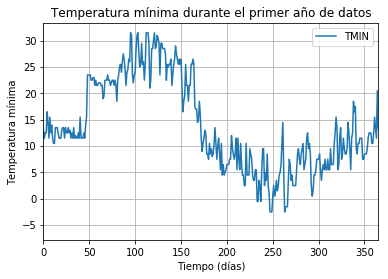

FECHA
January       7.722616
December      7.978622
February      8.434426
March         9.217333
November      9.567929
April        10.973836
May          13.232931
October      13.662269
June         17.581977
September    18.117347
August       19.742767
July         19.994451
Name: TMIN, dtype: float64

In [52]:
#En la siguiente gráfica podemos ver como la temperatura mínima varía a lo
#largo de un año.
plt.figure(); df.TMIN.plot(); plt.legend(loc='best')
plt.title("Temperatura mínima durante el primer año de datos")
plt.ylabel("Temperatura mínima")
plt.xlabel("Tiempo (días)")
plt.xlim((0,365))
plt.grid(True)
plt.savefig("tmin",dpi=2000)
plt.show()

df.groupby(df['FECHA'].dt.strftime('%B'))['TMIN'].mean().sort_values()


<Figure size 432x288 with 0 Axes>

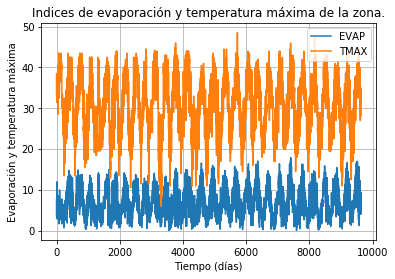

In [51]:
#En esta gráfica podemos ver de qué manera se relacionan las temperaturas máximas
# y los índices de evaporación del agua.
df1 = df[['EVAP','TMAX']]
plt.figure(); df1.plot(); plt.legend(loc='best')
plt.title("Indices de evaporación y temperatura máxima de la zona.")
plt.xlabel("Tiempo (días)")
plt.ylabel("Evaporación y temperatura máxima")
plt.grid(True)
plt.savefig("evaptemp",dpi=2000)
plt.show()



In [47]:
#Variación estandar cada columna.
df.std()

PRECIP    3.040309
EVAP      3.266884
TMAX      6.743938
TMIN      8.031797
dtype: float64

In [49]:
#Mediana de cada columna
df.median()

PRECIP     0.0
EVAP       6.5
TMAX      32.0
TMIN      11.5
dtype: float64

In [50]:
#Final de la tabla de datos.
df.tail()

,FECHA,PRECIP,EVAP,TMAX,TMIN
9629,1986-10-17,0.0,7.6,35.0,14.0
9630,1986-10-18,0.0,7.9,32.0,14.0
9631,1986-10-19,0.0,6.5,31.0,12.0
9632,1986-10-20,0.0,4.1,31.0,12.0
9633,1986-10-21,0.0,7.5,32.0,13.0
